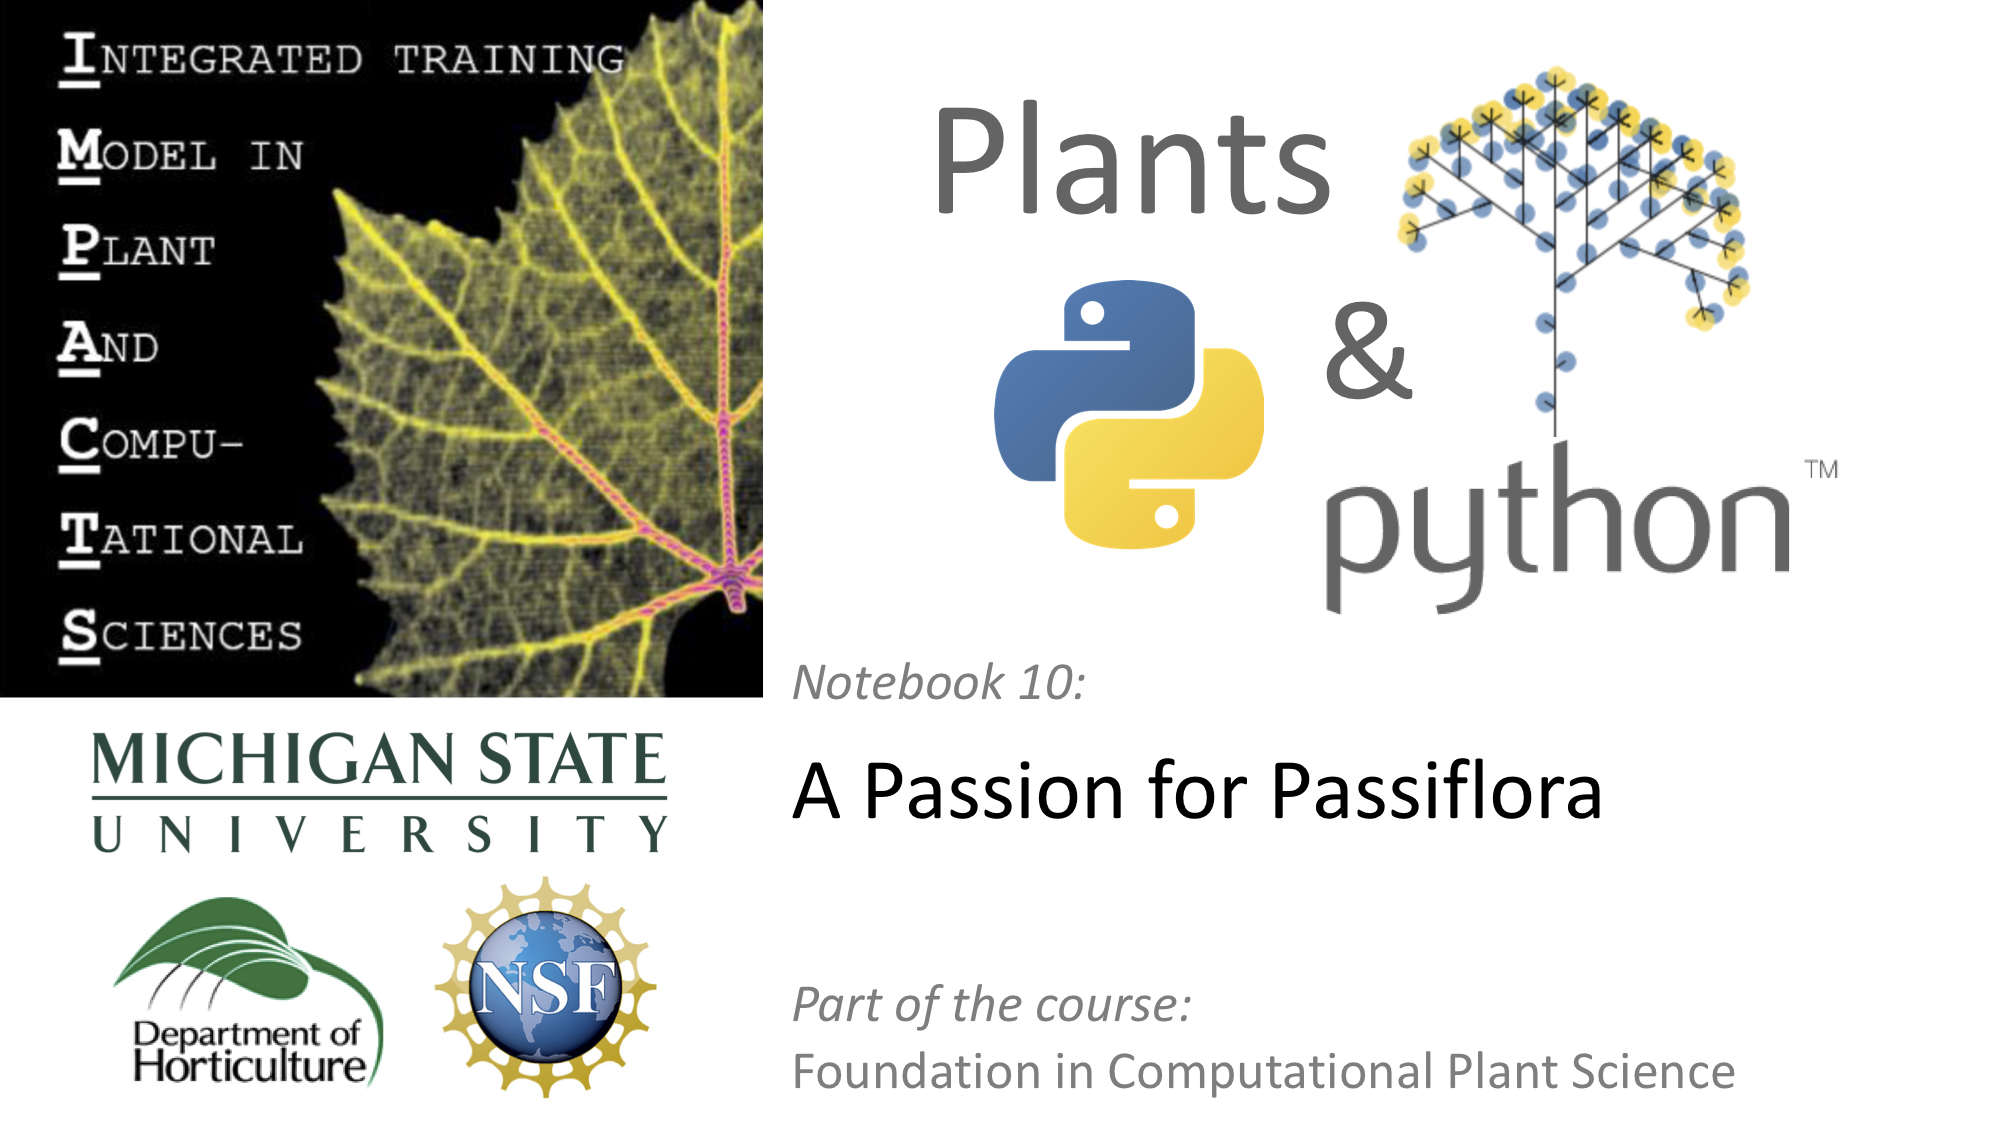

____
# A Passion for Passiflora

In the previous notebook, we learned about how to manipulate datasets and do statistics using `pandas`, as well as how to model data by fitting curves using the `polyfit()`, `poly1d()`, and `curve_fit()` functions. Fitting curves made a lot of sense for the climate data that we were looking at: afterall, global temperature is a curve that is increasing in value! But fitting curves and modeling data can be used in more abstract ways.

In this notebook, we will be analyzing morphometric data from "[Morphometric analysis of Passiflora leaves: the relationship between landmarks of the vasculature and elliptical Fourier descriptors of the blade](https://academic.oup.com/gigascience/article/6/1/giw008/2865207)", by Chitwood and Otoni (GigaScience, 6(1), 2017). In this work, the shapes of 40 different *Passiflora* species are analyzed. You probably have seen the beautiful flowers of *Passiflora* species. But they have diverse leaf shapes as well: [one hypothesis](https://www.frontiersin.org/articles/10.3389/fevo.2016.00081/full) is that *Passiflora* species evolved different leaf shapes to evade butterflies that recognize the shapes and lay their eggs on the leaves!

The way that leaf shape is measured is by putting ***landmarks*** on morphological features. These landmarks correspond to features that can be found on every leaf. Landmarks are simply `x` and `y` coordinate values measured from a 2D scan of leaves. There is a problem, though: how do we superimpose these coordinates to meaningfully analyze them? A [Procrustes analysis](https://en.wikipedia.org/wiki/Procrustes_analysis) is used to ***translate***, ***scale***, and ***rotate*** the shapes so that they can be superimposed, minimizing a statistic known as the Procrustes distance.

In the figure below, take a look at the different landmarks used to mark *Passiflora* leaves. The numbers correspond to the data that you will be analyzing today.

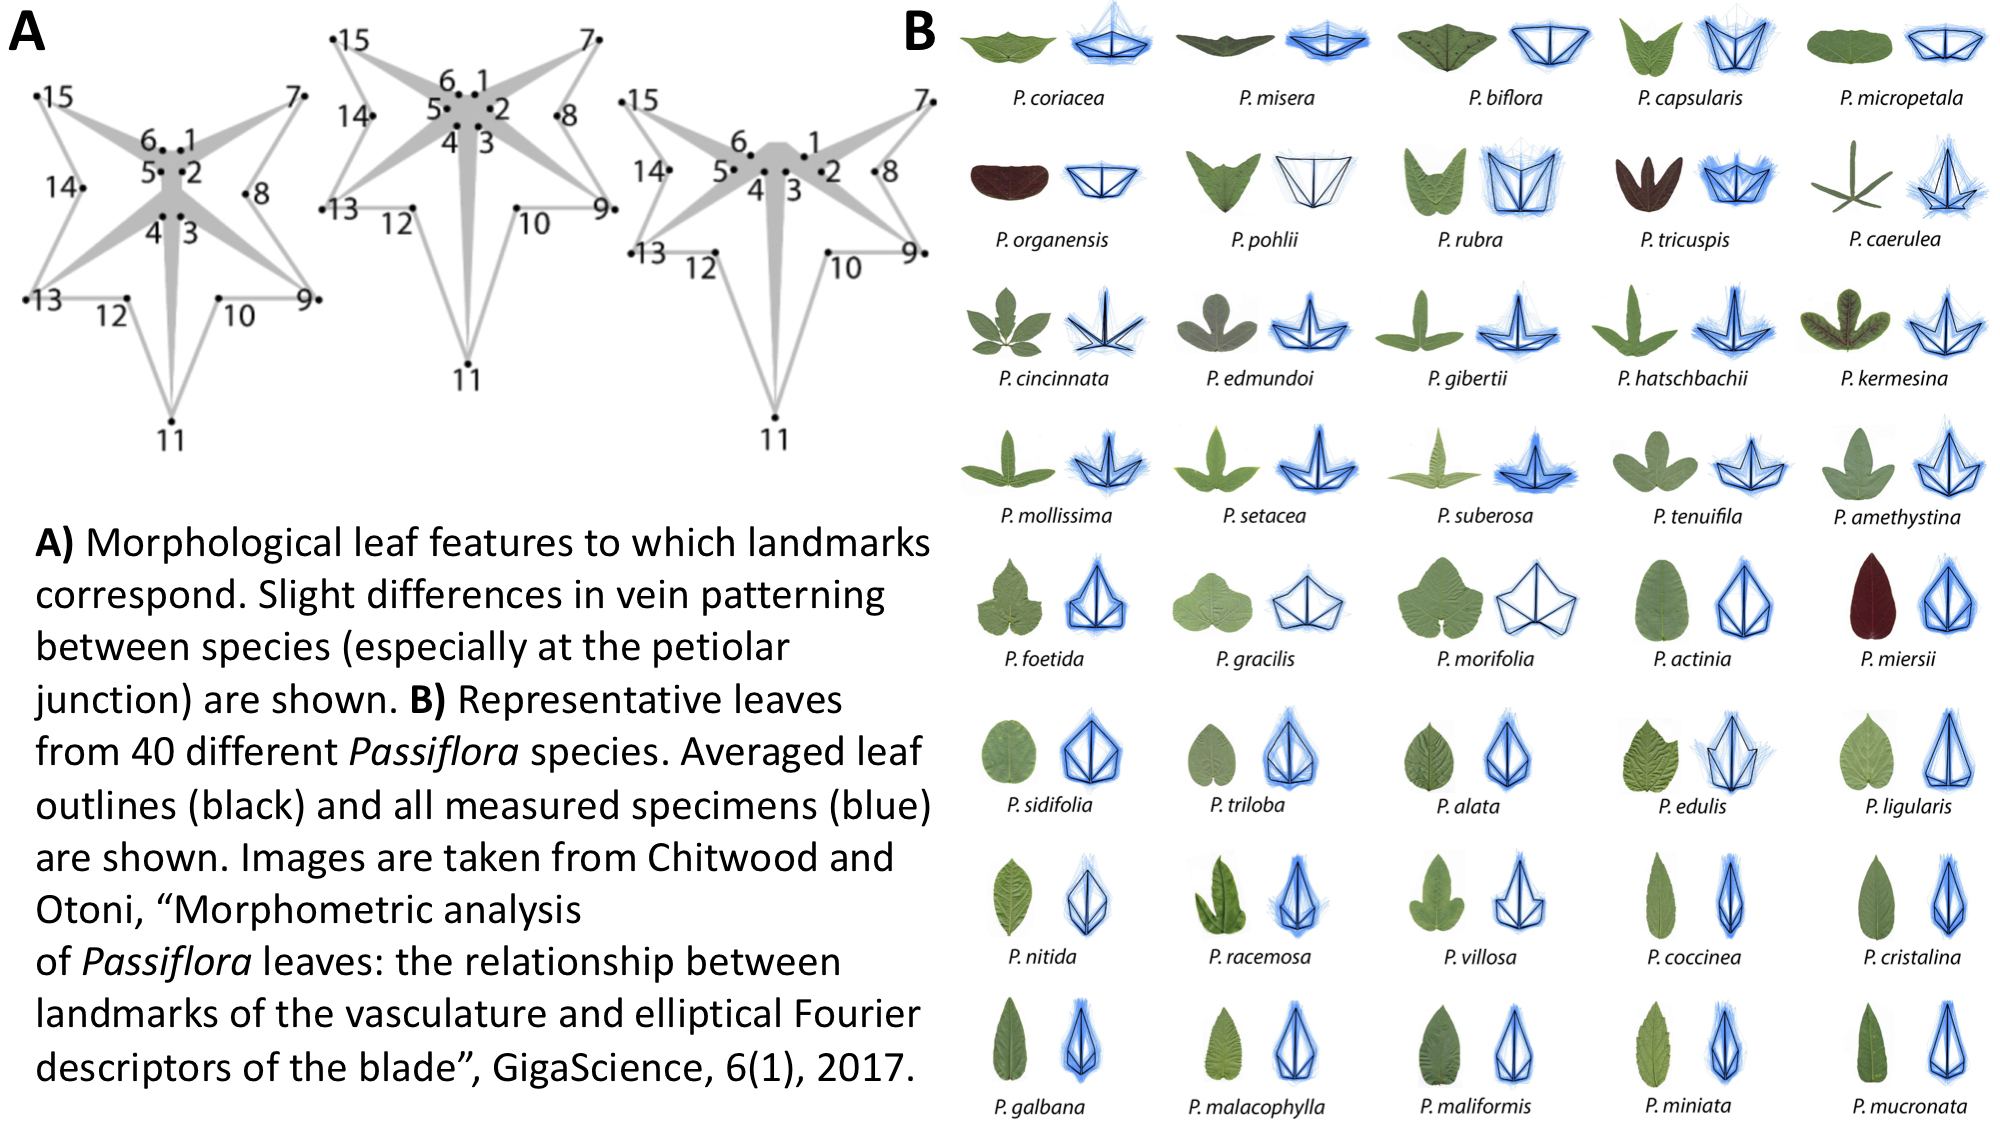

_____
## Data exploration

Today we will be modeling changes in leaf shape across the vines of *Passiflora* species. ***Heteroblasty*** is the changes in leaf shape that occur as a plant transitions from juvenile to adult vegetative growth, also known as phase change. Heteroblasty is changes in the form and function of the first leaves produced to those produced just before flowering. Heteroblasty can be subtle or profound, it can affect shape but other traits as well, and it may or may not have functional consequences, depending on context. One view of heteroblasty is that it reflects temporal changes in the vegetative shoot apical meristem as it progresses to flowering.

The dataset we will be working with today can be downloaded [here](https://github.com/DanChitwood/PlantsAndPython/blob/master/procrustes_landmarks.csv): `procrustes_landmarks.csv`.

The dataset has the following columns:
* `plant`: an ID for each plant
* `species`: the species epithet
* `ontogeny`: the leaf number starting at the tip of the shoot counting to the base
* `total`: the total number of leaves for each plant
* `heteroblasty`: the leaf number starting at the base of the shoot counting to the tip
* Coordinates: `x` and `y` coordinate values, numbered by the landmark they correspond to

First import `matplotlib.pyplot` (as well as the inline functionality), `numpy`, and `pandas`

In [ ]:
# Put your answer here




Next, read in the `procrustes_landmarks.csv` file as a pandas dataframe in the cell below.

In [ ]:
# Put your answer here




Examine the first five lines of the dataframe.

In [ ]:
# Put your answer here




Examine the last five lines of the dataframe.

In [ ]:
# Put your answer here




Use a pandas function to examine the count, mean, min, max, and quantile values of columns with continuous data.

In [ ]:
# Put your answer here




Use a pandas function to determine the names of the unique species represented in this dataset.

In [ ]:
# Put your answer here




Using a pandas function, determine for each species how many leaves were measured.

In [ ]:
# Put your answer here




Using a pandas, make a histogram of the total number number of leaves per plant

In [ ]:
# Put your answer here




___
## Masking and data clean up

Let's clean up our data a little bit before using it. Looking at the histogram of total leaves you just made, maybe we don't want to include plants with < 10 leaves.  Use a mask to remove all leaves that came from plants with a `total` leaf number < 10. Remember: a mask is just a Boolean statement to select those rows that are `True`. Call the new, masked dataset `at_least_10`.

In [ ]:
# Put your answer here




Now, going further, let's restrict our analysis to the eight species with the most leaves. Use the `value_counts()` function on the dataframe `at_least_10` to find the counts for each species. You can treat the resulting output like a list, and index it similarly. On the same line of code that you use `.value_counts()`, append square brackets on the end and with the `[start:end]` format, restrict the output to the eight species with the most leaves.

In [ ]:
# Put your answer here




For the eight species with the most leaves, use masks to create new dataframes for each that only contain leaves from each species. Name each dataframe after the species epithet. Use the `at_least_10` dataframe as the starting dataframe that you mask.

In [ ]:
# Put your answer here




___
## Visualization

Let's visualize some of our data!

Remember that we use the `.iloc` function to select specific data within a dataframe. We can isolate rows and columns using the following notation with `.iloc`: `[row_start:row_end , col_start:col_end]`. You can isolate non-continuous sets of rows and columns using the following format: `[ [0]+[2]+[5] : [3]+[7]+[11] ]`

Below, are the sequence of landmarks that specify the vein and blade structures of the landmarked leaves. These sequences of landmarks will create polygons for veins and blades that you can you use to plot out the leaves and inspect them, using the respective `x` and `y` coordinate values.

```python
x values, veins: [5]+[17]+[7]+[21]+[9]+[25]+[11]+[29]+[13]+[33]+[15]+[5]
y values, veins: [6]+[18]+[8]+[22]+[10]+[26]+[12]+[30]+[14]+[34]+[16]+[6]

x values, blade: [5]+[17]+[19]+[21]+[23]+[25]+[27]+[29]+[31]+[33]+[15]+[5]
y values, blade: [6]+[18]+[20]+[22]+[24]+[26]+[28]+[30]+[32]+[34]+[16]+[6]
```

In the cell below, create four new variables to store dataframes. The names of your new dataframes will be:

1. `veins_x`
2. `veins_y`
3. `blade_x`
4. `blade_y`

Then, ***pick a species!*** It must be one of the eight species with the most leaves.

Finally, create each new dataframe by using the `.iloc` function on the masked dataframe for the species that you picked and selecting all rows, but only the columns, ***and in the order specified above***, for each set of x and y coordinate values for veins and blade, for each of the four respective datasets.

In [ ]:
# Use .iloc on one of the masked dataframes for the eight species 
# isolating the columns in the order given above

veins_x =
veins_y =

blade_x =
blade_y =


Next, let's make some plots of leaves! For your favorite species, you can use your new dataframes `veins_x`, `veins_y`, `blade_x`, and `blade_y`. These will be the `x` and `y` values for your plots. You will make two, superimposed plots: one for the veins and one for the blade. You can use `plt.fill()` to create filled in shapes, or your can use `plt.plot()` or `plt.scatter()` at your discretion.

When you reference your new dataframes `veins_x`, `veins_y`, `blade_x`, and `blade_y` to plot, though, do the following:

1. Create a variable `i`. Each row of the above datasets is many leaves, but we want to plot just one leaf! Use `i` to select a row from your dataframes (you could even use a random function going up to the length of your dataframes, if you like) by using `.iloc` on each of your dataframes when you plot.

2. For the `y` values, place a negative sign in front of them in your plot (otherwise, you will plot an upside-down leaf!)

In [ ]:
# Put your answer here




Now that we plotted one leaf, let's plot them all together! Make a plot of all the leaves. You will still need to use `.iloc`, but using a notation to include all the data, rows and columns.

However, there is just one small change we have to make. When we use `.iloc` and specify a specific row, as above, the row is printed as a column. But when we use `.iloc` to specify the whole dataframe as we do here, it will print out the dataframe as it is: rows as rows and columns as columns.

Compared to the plot above, you need to ***transpose*** your dataframe, and convert rows to columns and vice versa. The way you do this is `dataframe.T.iloc[:]`.

You should use `plt.plot()` in order to make outlines, make veins and blade different colors, and use an `alpha` so that you can see all the leaves together. The `alpha` can be as low as 0.05.

In [ ]:
# Put your answer here




____
## Models of heteroblasty

When we plot all the leaves superimposed on each other like we did above, it seems like random variation. But that isn't the case entirely. Each of these leaves arises from a node. We will be modeling the shape changes that occur in leaves across the vine from node-to-node. We will be modeling shape as a function of the variable `heteroblasty`, which counts each leaf from the base to the tip of the vine.

Check out some of the heteroblastic leaf shape changes in the figure below:

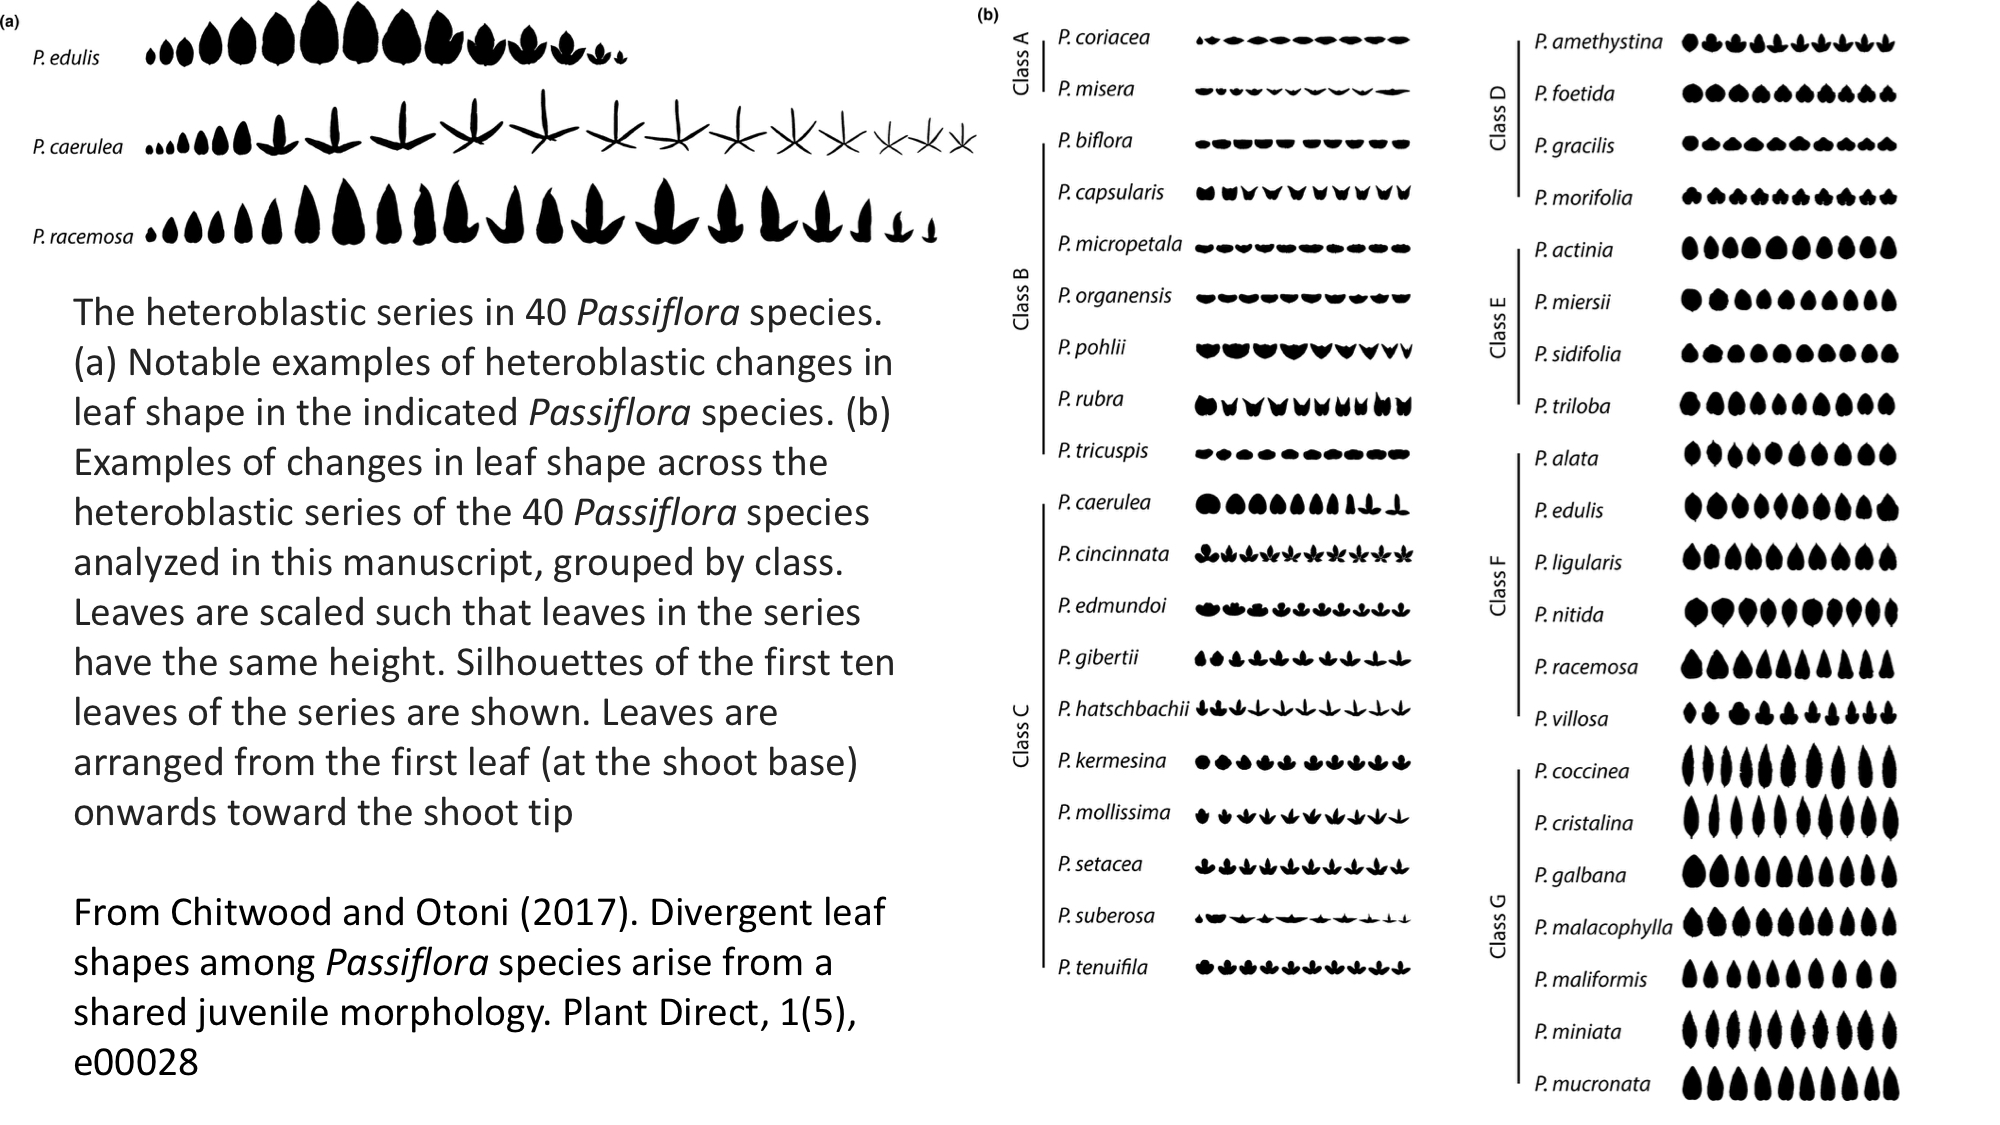

Let's explore some of the shape changes that occur during heteroblasty, across the vine. The "shape", what is being modeled in this case, is actually 30 different `x` and `y` values representing 15 landmarks! Let's step back and explore just one landmark in one species.

If you notice in the example figure of heteroblastic leaf shape changes, leaves tend to get more lobed as the heteroblastic series progresses. Let's examine how the landmark `y12` behaves, which represents the sinus of the distal lobe. And let's use the species `tricuspis`, the most abundant.

In the last lesson, we learned how to use `np.polyfit()` and `np.poly1d()` to fit a polynomial model to data.

In the cell below, model `y12` as a function of `heteroblasty`. Like we did in the last lesson, immediately graph the results. Graph the real data, and also graph the modeled data using your new function derived from `poly1d()`. Use `np.linspace()` to model value x values from the minimum to maximum heteroblasty values.

Try out different orders of polynomials. Look at different landmarks. What is an appropriate order of polynomial to model this data?

In [ ]:
# Put your answer here




So it seems it's relatively easy to fit a polynomial to one landmark value. But we have 30! How do we go about modeling all the landmarks at once?

Before doing so, we're going to need to do a lot of formatting. This is what is called "data wrangling", and it can honestly take more time than the data analysis.

What we need to do is, before writing a loop to run models for each of the landmark values across the heteroblastic series, is convert our dataframe to a `numpy` array. We also need to get rid of some columns and only keep the ones we will be working with.

Once we create a function to convert a dataframe to an array, we will then use it in another function to retrieve modeled leaf shapes continuously across the heteroblastic series.

Let's figure out how to convert to an array and drop those columns!

Let's use `tricuspis` again. Use the `.drop()` function to drop columns `plant`, `species`, `ontogeny`, and `total`. The format is `.drop(columns=['A','B','C'])`.  Call your new dataframe `tricuspis_vals`.

In [ ]:
# Put your answer here




Next, we need to convert the dataframe with the dropped columns into a `numpy` array. Create an array called `tricuspis_array` using the following code: `.values`

In [ ]:
# Put your answer here




Next, index your array to look at some of the rows (like `.head()`, but for arrays) and use the `np.shape()` function to look at the dimensions of your array. Does everything look correct? Remember, we should have 31 values for each leaf (`heteroblasty` + the landmark values).

In [ ]:
# Put your answer here




Finally, let's create our function. Call your function `format_array` and the input is `dataframe`. Use the `.drop()` function to drop columns `plant`, `species`, `ontogeny`, and `total` and then use `.values` to convert to an array.

Your function should `return` an array called `species_array`.

In [ ]:
# Put your answer here




Great! Now we have a function to drop the columns of our dataframe and convert it to an array. You have also created functions to model polynomials as a function of heteroblasty. Let's put it all together!

Below, is a function called `model_landmarks`. It takes a `dataframe`, an order of polynomial to fit called `poly_order`, and something called `xvals`. `xvals` ends up being the number of steps using `np.linspace()` that we decide to model. You can think of it as how many points along the x-axis (heteroblasty) that we will be modeling.

The function then uses the `format_array` function to create an array. It then creates an array filled with zeros to hold the data that we will be generating using the `np.zeros()` function. The dimensions of this array are 30 (for each landmark value) by `xvals`, which is the number of modeled leaf shapes we will be generating.

Then, we loop over the array! Study the `for` loop. The array always uses the first column, which corresponds to `heteroblasty`, as the x values. It will then iterate over each landmark value as the y values. The model will be of the order `poly_order` that was specified. We then create predicted values called `model_values` from the resulting function using `np.linspace()`, which between the minimum and maximum `heteroblasty` values, create `xvals` number of steps to model leaf shapes. The appropriate row of the array `matrix` is then filled with the values, where rows correspond to each landmark and columns the modeled values across `xvals`.

We then need to ***transpose*** our table! The rows (landmarks) need to be the columns and the columns (modeled values across `xvals`) need to be rows! You will need to transpose often in your research career. There is an easy function for transposing an array: it is called `.T`.

Next, we re-create a dataframe with our transposed array, using the `pd.Dataframe()` function, and we also give the columns names.

Then, we create coordinates, in order, so we can plot the veins and blade, as we had done before. Except now we will have ***modelled*** veins and blade as a continuous series of shapes across the heteroblastic series.

The function returns four dataframes to plot out the modeled leaves: `veins_x`, `veins_y`, `blade_x`, `blade_y`. 

Study the function below and make sure you understand what the code is doing.

In [33]:
def model_landmarks(dataframe, poly_order, xvals):
    
    array = format_array(dataframe)
        
    matrix = np.zeros((30, xvals))

    for i in range(30):

        N = np.polyfit( array[:,0], array[:,i+1], poly_order )
        func = np.poly1d(N)
        model_values = func( np.linspace(min(array[:,0]), max(array[:,0]), xvals) )
        matrix[i,:] = model_values

    Tresults = matrix.T
    
    df = pd.DataFrame(data=Tresults, columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 
                                          'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12',
                                          'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15'
                                         ])
    
    veins_x = df.iloc[:, [0]+[12]+[2]+[16]+[4]+[20]+[6]+[24]+[8]+[28]+[10]+[0] ]
    veins_y = df.iloc[:, [1]+[13]+[3]+[17]+[5]+[21]+[7]+[25]+[9]+[29]+[11]+[1] ]

    blade_x = df.iloc[:, [0]+[12]+[14]+[16]+[18]+[20]+[22]+[24]+[26]+[28]+[10]+[0] ]
    blade_y = df.iloc[:, [1]+[13]+[15]+[17]+[19]+[21]+[23]+[25]+[27]+[29]+[11]+[1] ]
    
    return veins_x, veins_y, blade_x, blade_y




Now try your function! Pick a species (one of the top eight), and then retrieve the blade and vein coordinates. Make a plot of all the modeled leaves superimposed on each other. Remember, you will need to plot the data as `dataframe.T.iloc[:]`.

Try out different species!

In [ ]:
# Put your answer here




___
## Principal Component Analysis (PCA)

We can plot, and model!, multiple landmarks at once. We are trying to study the "shape" of the *Passiflora* leaves. But it is problematic that we have to represent shape with so many numbers (30!). Is there a way we could reduce the numbers that we need to analyze. Is there a way to ***reduce the dimensions*** of our data?

Fortunately, there is! It is called ***Principal Component Analysis***, or PCA. PCA is the most famous of a class of techniques that reduce dimensions. 

We don't have enough time in this course to explain the math behind PCA. But read through this interactive [example](http://setosa.io/ev/principal-component-analysis/). A crucial aspect of dimension reduction using PCA is that we ***rotate*** our data to a new set of axes. Each of these new axes, the ***principal components*** (or PCs), explains more variation in our data than the original axes we started with. Because more variation in our data is explained with fewer axes, PCA potentially reduces the numbers of axes we need to work with. Hence, dimension reduction.

Another interesting aspect of PCA is that if something you are trying to study is made up of numerous components that don't necessarily mean anything on their own (like 30 landmark values), the resulting PCs, a composite of all the original input traits, can summarize their whole. The resulting top PCs, which explain large amounts of information, represent shape wholistically. Plotting out the PC values, we can look for differences between groups, for their ***overall shape***, and not just component landmarks by themselves.

So let's reduce the overall dimensions of our landmarks, for both the real and the modeled data, and look for differences between species.

### Create our datasets

First, let's create our datasets. For the "real data", we will use the `pandas` `.isin()` function. `.isin()` is appended to a dataframe with a selected column, and it is provided a list of the category levels to isolate. The output is a mask that can be used to isolate the corresponding rows in the dataframe.

In the cell below, use `.isin()` with the `at_least_10` dataframe to create a mask to isolate the top eight species. Then, use this mask with the `at_least_10` dataframe to create a masked dataframe of just the top eight species.

Call your new dataframe `real_8`.

Finally, use the following function on `real_8` and call the new dataframe `real_8` also, overwriting the first: `.reset_index(drop=True)`. This function will reset the indexing (row numbers) and with `drop=True`, it will do so without creating a new column.

`.head()` and `.tail()` your new dataframe to make sure everything is OK.

In [ ]:
# Put your answer here




Next, let's create a dataframe of all our ***modelled*** coordinates. The function below is the same as before, with just a few adjustments to return a whole dataframe. Use it to create dataframes of modelled data for each of the eight species. Use each of the eight masked species dataframes you created before as the initial data. 

In [143]:
def all_model_coordinates(dataframe, poly_order, xvals, species):
    
    array = format_array(dataframe)
        
    matrix = np.zeros((30, xvals))

    for i in range(30):

        N = np.polyfit( array[:,0], array[:,i+1], poly_order )
        func = np.poly1d(N)
        model_values = func( np.linspace(min(array[:,0]), max(array[:,0]), xvals) )
        matrix[i,:] = model_values

    Tresults = matrix.T
    
    df = pd.DataFrame(data=Tresults, columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 
                                          'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12',
                                          'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15'
                                         ])
    
    df['species'] = species
    
    return df

In [ ]:
# Put your answer here




Next, we need to ***concatenate*** the eight dataframes above into a single dataframe!

Do this:

1. Create a list of the modelled dataframes for each species you just created. Call it `frames`.

2. Use the `pd.concat(frames)` function and store the resulting concatenated dataframe in a variable called `model_8`.

3. Overwrite `model_8` using the `.reset_index(drop=True)` function

4. `.head()` and `.tail()` the resulting dataframe to make sure everything is OK.

Note: the last column should be `species`, which is the species identity for each leaf, and useful for plotting in our PCA!

In [ ]:
# Put your answer here




### Perform PCA

Now we have dataframes of our "real" and "modeled" data: `real_8` and `model_8`. Let's perform a PCA!

Let's start with the real data. First, we want to isolate ***only*** the numbers in our dataframe, that is the landmark values.

Using indexing and `.iloc()` on the `real_8` dataframe, isolate only the landmark columns. Call your new dataframe `real_x`.

Be sure to `.head()` your dataframe to make sure it is correct.

In [ ]:
# Put your answer here




Now for the PCA. We will be using PCA from the scikit learn module. We first call up PCA using the `PCA()` function, and specify how many PCs to return. To make it simple for now, let's only return the first two PCs. We then use `.fit_transform()` to perform the PCA on our data `real_x` and return the principal components. We then convert the PCs into a `pandas` dataframe to use later. For the `real_x` data, the code is provided below:

In [147]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

real_PCs = pca.fit_transform(real_x)

real_PCs_df = pd.DataFrame(data = real_PCs, columns = ['PC1', 'PC2'])

We use the `.explained_variance_ratio_` function to see how much overall variance in our data is explained by each of the PCs

In [148]:
pca.explained_variance_ratio_

array([0.48682335, 0.18017986])

49% and 18% of all shape variance is explained by PC1 and PC2 respectively! 67%, almost two-thirds!, of all variance is represented when we plot out the first two PCs and look for differences between species!

Finally, we concatenate our PCs with the original dataframe. This will put the species information back together again with the PCs so that we can plot it. The `axis=1` refers to concatenating the columns, not the rows.

In [149]:
final_real_df = pd.concat([real_8, real_PCs_df], axis = 1)

Now it's time to plot! Use the seaborn `sns.lmplot()` function to plot `PC2` versus `PC1`. Set `hue` equal to `species` to visualize species differences, and remember to set `fit_reg` equal to `False`.

In [ ]:
# Put your answer here




### Try it yourself!

Now that you know how to do PCA, perform a PCA on the modeled data yourself! Start with the `model_8` dataframe you created.

* How much variance is explained by each PC?
* What patterns do you see?
* How does this pattern compare to the PCA of the real data?
* Because this is modeled data, how would you interpret the patters are you seeing?

In [ ]:
# Put your answer here, and create more cells as needed




____
That's all for this lesson! If you are not in the course and are using these materials remotely and would like the answers, feel free to email Dr. Dan Chitwood (Michigan State University, Depts. Horticulture and Computational Mathematics, Science, & Engineering) at dhchitwood [ at ] gmail [ dot ] com